# Spotipy Test

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import cred

In [2]:
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
scope = "user-read-recently-played"

In [122]:
#sp = spotipy.Spotify(
#        auth_manager=SpotifyOAuth(
#                client_id=cred.client_id, 
#                client_secret= cred.client_secret, 
#                redirect_uri=cred.redirect_url, 
#                scope=scope))

In [123]:
#results = sp.current_user_recently_played()
#for idx, item in enumerate(results['items']):
#    track = item['track']
#    print(idx, track['artists'][0]['name'], " – ", track['name'])

In [124]:
#first_song_id = results['items'][0]['track']['id']

In [125]:
#sp.audio_features(tracks=[first_song_id])

In [8]:
#aa = sp.audio_analysis(first_song_id)

In [9]:
#aa.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

In [126]:
#aa['track'].keys()

In [11]:
scope = "user-top-read"
sp = spotipy.Spotify(
        auth_manager=SpotifyOAuth(
                client_id=cred.client_id, 
                client_secret= cred.client_secret, 
                redirect_uri=cred.redirect_url, 
                scope=scope))

In [168]:
top_tracks = sp.current_user_top_tracks(limit=100,time_range='long_term')

In [169]:
top_tracks_ids = [e['id'] for e in top_tracks['items']]
top_tracks_name = [e['name'] for e in top_tracks['items']]
top_tracks_popularity = [e['popularity'] for e in top_tracks['items']]
top_tracks_album_name = [e['album']['name'] for e in top_tracks['items']]
top_tracks_artist_name = [e['artists'][0]['name'] for e in top_tracks['items']]
top_tracks_artist_ids = [e['artists'][0]['id'] for e in top_tracks['items']]

In [170]:
top_tracks_audio_features = sp.audio_features(tracks=top_tracks_ids)

In [171]:
top_tracks_artists = [sp.artist(i) for i in top_tracks_artist_ids]
top_tracks_genres = [e['genres'] for e in top_tracks_artists]

In [172]:
top_tracks_df = pd.DataFrame(top_tracks_audio_features)

In [173]:
top_tracks_df['track_name'] = top_tracks_name
top_tracks_df['album_name'] = top_tracks_album_name
top_tracks_df['artist_name'] = top_tracks_artist_name
top_tracks_df['track_popularity'] = top_tracks_popularity
top_tracks_df['genres'] = top_tracks_genres

In [174]:
genres_in_list = [e for ee in top_tracks_genres for e in ee]

In [175]:
all_genres = sorted(list(set(genres_in_list)))

In [176]:
for g in all_genres:
    top_tracks_df[g] = top_tracks_df['genres'].apply(lambda x: 1 if g in x else 0)

In [177]:
audio_features = ['danceability','energy','loudness',
  'speechiness','acousticness','instrumentalness','liveness', 'valence']

- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- Acousticness: A measure from 0.0 to 1.0 of whether the track is acoustic.
- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


From https://medium.com/@boplantinga/what-do-spotifys-audio-features-tell-us-about-this-year-s-eurovision-song-contest-66ad188e112a

In [178]:
audio_features_df = top_tracks_df[audio_features]

In [179]:
dim_reductor = PCA(n_components=3, whiten=True)
reduced_dims = dim_reductor.fit_transform(audio_features_df.values)

In [180]:
dim_reductor.explained_variance_ratio_

array([0.99125613, 0.004392  , 0.00171218])

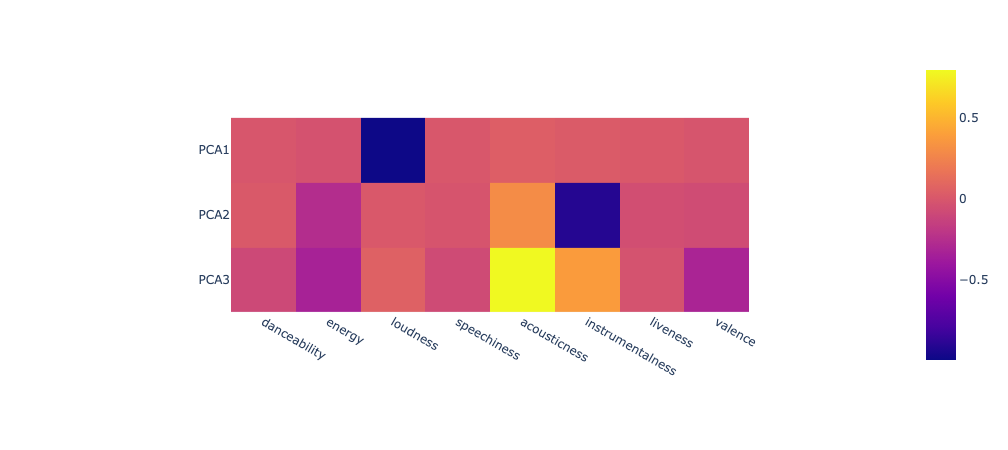

In [181]:
components_df = pd.DataFrame(dim_reductor.components_)
components_df.columns = audio_features
components_df.index = ['PCA1', 'PCA2', 'PCA3']
px.imshow(components_df)

In [182]:
top_tracks_df['PCA1'] = reduced_dims[:,0]
top_tracks_df['PCA2'] = reduced_dims[:,1]
top_tracks_df['PCA3'] = reduced_dims[:,2]

In [183]:
import plotly.express as px

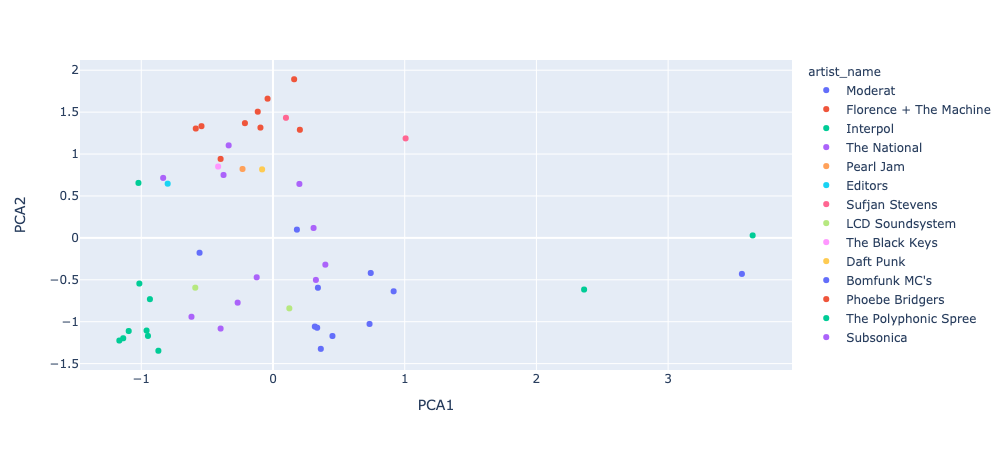

In [184]:
px.scatter(data_frame=top_tracks_df, x='PCA1', y='PCA2',hover_name='track_name', color='artist_name')

In [185]:
from collections import Counter
Counter(genres_in_list).most_common(20)

[('modern rock', 24),
 ('alternative dance', 23),
 ('new rave', 23),
 ('indie rock', 23),
 ('rock', 15),
 ('alternative rock', 14),
 ('dance-punk', 13),
 ('electronica', 12),
 ('microhouse', 10),
 ('minimal techno', 10),
 ('baroque pop', 10),
 ('stomp and holler', 10),
 ('pop', 8),
 ('uk alternative pop', 8),
 ('chamber pop', 2),
 ('freak folk', 2),
 ('indie folk', 2),
 ('singer-songwriter', 2),
 ('electronic rock', 2),
 ('indie pop', 2)]

In [186]:
top_tracks_df[top_tracks_df['stomp and holler']==1][['track_name','artist_name','album_name']]

,track_name,artist_name,album_name
3,Nobody Else Will Be There,The National,Sleep Well Beast
7,Empire Line,The National,Sleep Well Beast
10,The System Only Dreams in Total Darkness,The National,Sleep Well Beast
13,I'll Still Destroy You,The National,Sleep Well Beast
16,Mr. November,The National,Alligator
25,Day I Die,The National,Sleep Well Beast
40,This Is The Last Time,The National,Trouble Will Find Me
43,Guilty Party,The National,Sleep Well Beast
45,Dark Side of the Gym,The National,Sleep Well Beast
49,I Should Live in Salt,The National,Trouble Will Find Me
